# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [76]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [66]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Skywind\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


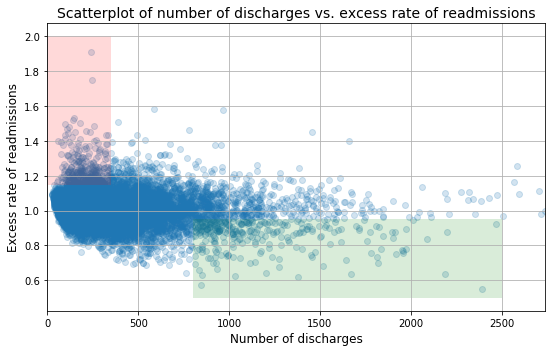

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A.

**I don't agree with the above analysis and recommendations.**

**In the initial observations, the red shaded area has placement bias. The red area should cover all the plots in the horizontal width of the rectangle. Since it is measuring lower number of discharges, the horizontal length should stay the same while covering the entire vertical distance of the plot. The same can be said about the green area. It has enough horizontal length, but not enough vertical so it seems like there is a relationship but due to the placement bias it is invalid. Once the placement of the shaded area has been fixed, there is a very slight difference between the two plots. A pearson correlation coefficient would be helpful in determining how weak the correlation is.**

**The statistics part seems ungrounded considering that there is no code computing these statistics. Since the original dataset didn't have enough information, it could be that the sample doesn't represent >1000 number of discharges enough that it should. There is also a typo, so technically the first statement under statistics is incorrect.**

**First part of conclusions claims that there is a significant correlation, but this was based on placement bias in the initial observations. No correlation coefficient was actually computed and no hypothesis test for a significant correlation was computed either so this conclusion is completely ungrounded. I also believe there is at least one lurking variable invovled here that the conclusion does not mention. The size of the hospital or average number of admitted patients could be one. The analysis above seems to assume that 'Number of Discharges' and hospital size is the same thing, but I think they should be differentiated.**

**Due to the possible presence of lurking variables and the fact that the claimed significant correlation is ungrounded, the recommendations are invalid.**

## B.

### Data cleaning

In [54]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [67]:
#Include only rows where 'Number of Discharges' has a value.
hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']

In [68]:
#Convert 'Number of Discharges' to correct data type
hospital_read_df['Number of Discharges'] = hospital_read_df['Number of Discharges'].astype(int)

In [70]:
#Include only non null values of 'Excess Readmission Ratio'
clean_df = hospital_read_df[hospital_read_df['Excess Readmission Ratio'].notnull()]

In [73]:
clean_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


### 1. Setup an appropriate hypothesis test

** The null hypothesis is rho = 0, the alternative is rho =/= 0 **

### 2. Compute and report the observed significance value (or p-value)

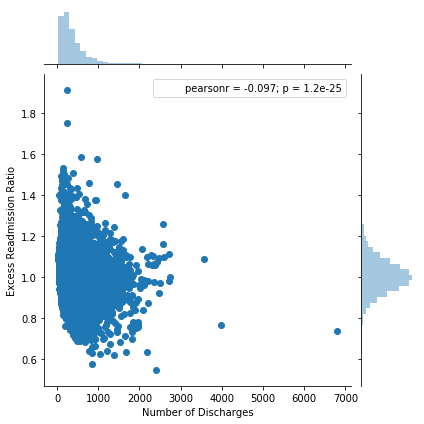

In [84]:
sns.jointplot(x = 'Number of Discharges', y = 'Excess Readmission Ratio', data = clean_df)
plt.show()

**Above we see a joint plot between our two variables. We see that 'Excess Readmission Ratio' is normally distributed with about mean 1. 'Number of Discharges' is right skewed.**

**We see that the observed p value is 1.2e-25.**

### 3. Report statistical significance for  α  = .01

**Since .01 > 1.2e-25, we reject our null hypothesis that rho = 0. In other words, we reject our null that there is no linear relationship between 'Excess Readmission Ratio' and 'Number of Discharges'.**

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

**r = -0.097 shows that we have a very weak negative correlation between the two variables. This is not practically significant. We only found that this was statistically significant because we have a fairly large sample size. Anything with a large sample size typically ends up as statistically significant.**

**There is one point in the plot that seems like an outlier. We can check it.**

In [80]:
clean_df[clean_df['Number of Discharges'] > 5000]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


**We see the hospital name, "Hospital for Special Surgery'. It may be helpful to categorize hospitals into various types so that its effect on the 'Number of Discharges' and 'Excess Readmission Ratio' is taken into account.**

**The recommendations in the preliminary analysis are invalid. It assumes practical significance which we do not have here. I would recommend that the client collects more information about each hospital. We need to know more about the hopsitals such as average number of admitted patients, size of the hospital, and hospital type. Other things like mortality rate or how many terminally ill patients there are could be helpful. Knowing the population of the city the hospital is located in may be helpful as well. Including as many variables as possible is good so that a relationship/trend can be found. I would discuss with the client about other possible lurking variables.**

### 5. Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.

**One of the disavantages of using the exact scatterplot above to convey information was previously discussed. There is placement bias of the colored areas which tries to illustrate something that isn't true. There is also a large number of cluttered points on the plot so we don't know how many points there are at that point. For data like this which contain a large number of observations, scatterplots are not ideal since they show every point.**

**An advantage in using scatterplots in general is that we see every point. So that this is both an advantage and a disadvantage. Another advantage in the plot above is that the red and green regions visualize a specific part of the plot so that we can easily compare one region to another. If the placement bias is fixed, it is beneficial to highlight the important parts of the plot to show a trend.**

**We can make a plot that shows the density of each area. We'll also focus on the bulk of the plot without some of the outliers so that we can visualize what's going on in the cluster of points.**

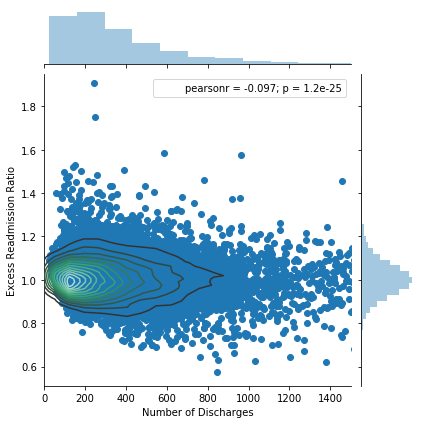

In [106]:
sns.jointplot(x = 'Number of Discharges', y = 'Excess Readmission Ratio', data = clean_df, xlim=(0, 1500)).plot_joint(sns.kdeplot,
              zorder=3, n_levels=15)
plt.show()

**In the plot above, we see the overall correlation coefficient with the associated p value in a typical hypothesis test for rho = 0, general distribution of points in the cluster, and the univariate distributions for each variable.** 